In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv("empsalpred.csv")
df.head()


,age,education,workclass,occupation,hours-per-week,native-country,salary
0,25,Bachelors,Private,Tech-support,40,United-States,50000
1,32,Masters,Self-emp-not-inc,Exec-managerial,50,United-States,72000
2,40,PhD,State-gov,Prof-specialty,45,United-States,98000
3,28,Bachelors,Private,Adm-clerical,38,United-States,45000
4,35,Masters,Private,Sales,60,United-States,78000


In [27]:
label_encoders = {}

# Encode all object-type columns and store encoders
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("salary", axis=1)
y = df["salary"]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 105462850.00
R² Score: 0.71


In [31]:
print(df.columns.tolist())


['age', 'education', 'workclass', 'occupation', 'hours-per-week', 'native-country', 'salary']


In [32]:
new_data = pd.DataFrame([{
    "age": 30,
    "education": label_encoders["education"].transform(["Masters"])[0],
    "workclass": label_encoders["workclass"].transform(["Private"])[0],
    "occupation": label_encoders["occupation"].transform(["Exec-managerial"])[0],
    "hours-per-week": 40,
    "native-country": label_encoders["native-country"].transform(["United-States"])[0]
}])

predicted_salary = model.predict(new_data)[0]
print(f"💰 Predicted Salary: ₹{predicted_salary:,.2f}")


💰 Predicted Salary: ₹57,510.00


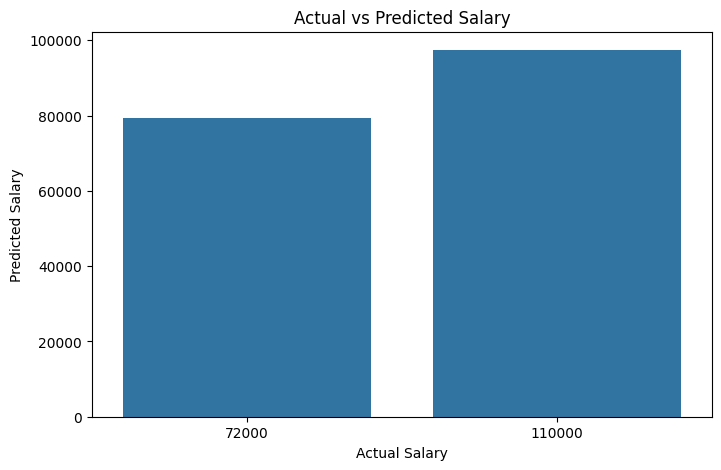

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x=y_test.values, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


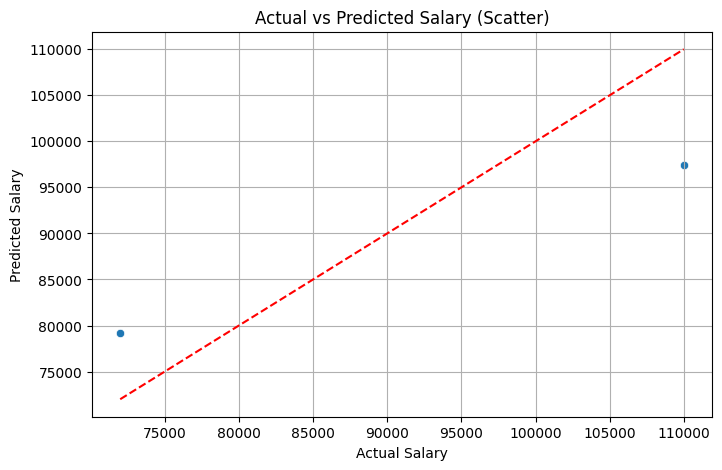

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Scatter)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.show()
